In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from network import Network

In [2]:
# Import Dataset
qcd_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/dihiggs_outputDataForLearning.csv')

qcd_raw.head()
print(len(qcd_raw), "rows of qcd data")
hh_raw.head()
print(len(hh_raw), "rows of dihiggs data")

# Make higgs and qcd sets from raw data
hh_all = hh_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
qcd = qcd_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]

1703 rows of qcd data
4605 rows of dihiggs data


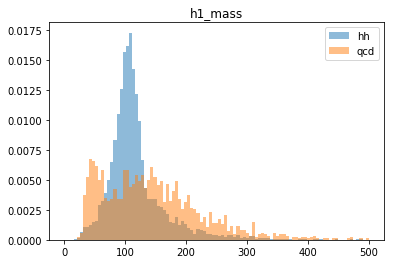

In [3]:
plt.hist(hh_raw['h1_mass'], label="hh", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.hist(qcd_raw['h1_mass'], label="qcd", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.title("h1_mass")
plt.legend()
plt.show()

In [4]:
hh_all = np.array(hh_all)
qcd = np.array(qcd)

# add labels to di-higgs
hh_all=hh_all[:,:4]
# print(hh[0:3])
hh_labels= np.zeros((len(hh_all),1))
hh_labels = hh_labels+1
#a = hh[:len(hh)]
# print(a.shape)
hh_all = np.append(hh_all, hh_labels, axis=1)
# print(hh.shape)
# print(hh[0:3])

# add labels to qcd
qcd=qcd[:,:4]
# print(hh[0:3])
qcd_labels= np.zeros((len(qcd),1))
#a = hh[:len(hh)]
# print(a.shape)
qcd = np.append(qcd, qcd_labels, axis=1)
# print(hh.shape)
# print(hh[0:3])
# print(qcd[:4])

# select a quarter of hh events so that the set is half and half
# we shuffle the list first to take a random 1/4. this means we have a different dataset every time
# np.random.seed(0)
# np.random.shuffle(hh_all) 
hh = hh_all[0:len(qcd)]
# print(hh[:4])
# print(qcd[:4])

all_data = np.append(hh,qcd, axis=0) 
all_data[:4,:]

np.random.seed(0)
for i in range (4): # shuffle 4 times
    np.random.shuffle(all_data) 
print(all_data[:4])
all_labels = all_data[:,4:]
all_data = all_data[:,:4]
# print(all_data[:4])
print(all_labels[:4])
# print(test_data)
# print(len(all_data))
# print(all_labels)

[[ 99.52746498 123.72713519   1.83328407   2.89078642   1.        ]
 [184.71024749  77.62334247   2.84355966   1.90858838   0.        ]
 [ 30.47812488  17.83909044   0.69238905   0.53948599   1.        ]
 [117.01806102  90.17471759   2.65217628   2.29208081   1.        ]]
[[1.]
 [0.]
 [1.]
 [1.]]


In [5]:
# scale the data by dividing it by the max value of each
all_data[:,0] = np.true_divide(all_data[:,0], np.max(all_data[:,0]))
all_data[:,1] = np.true_divide(all_data[:,0], np.max(all_data[:,0]))
all_data[:,2] = np.true_divide(all_data[:,0], np.max(all_data[:,0]))
all_data[:,3] = np.true_divide(all_data[:,0], np.max(all_data[:,0]))

In [6]:
# TODO: Train-Test split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.5, test_size=0.5, random_state=42)
# print(len(train_data))
# print(train_data)
# print(train_data.shape)
# print(train_labels)

In [7]:
learnRate = 0.01 
np.random.seed(0)
model = Network([4,3,2])
model.train(train_data, train_labels, 1201, learnRate, True, test_data, test_labels)


a is 
 tensor([[0.0528, 0.0528, 0.0528, 0.0528],
        [0.0902, 0.0902, 0.0902, 0.0902],
        [0.2577, 0.2577, 0.2577, 0.2577],
        ...,
        [0.1338, 0.1338, 0.1338, 0.1338],
        [0.2616, 0.2616, 0.2616, 0.2616],
        [0.2764, 0.2764, 0.2764, 0.2764]], dtype=torch.float64)
tensor([[ 0.3503,  1.7091,  1.7280],
        [-1.5641,  0.2809, -2.0846],
        [-0.0699,  0.4551,  0.0649],
        [ 0.3727, -0.7923, -1.5214]])


/Users/annacuddeback/LHCResearch/neu-physics/dihiggsMLProject/NeuralNetworking/network.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(a, dtype=torch.double)


RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #2 'mat2'